<a href="https://colab.research.google.com/github/trilgar/MSS_2021/blob/main/MSS_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

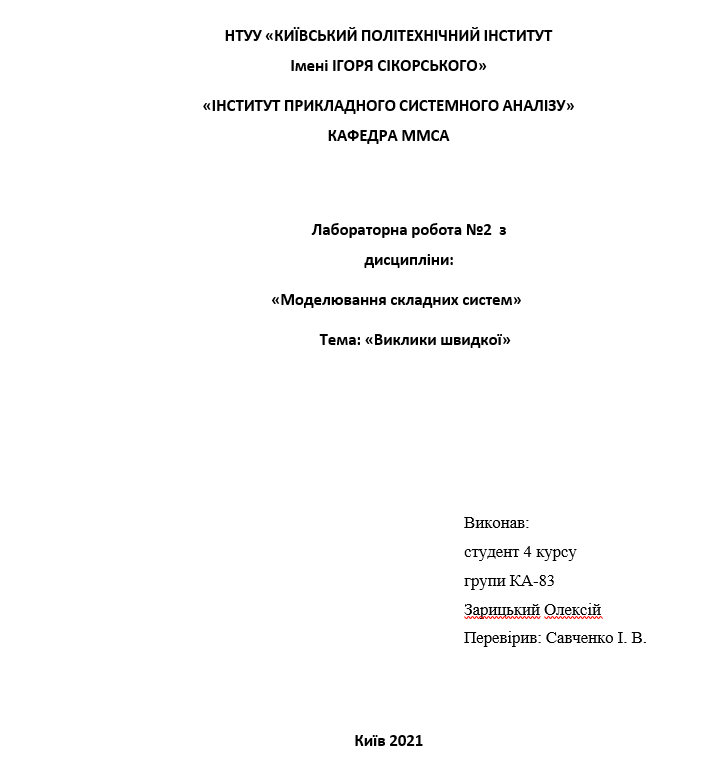

In [ ]:
import numpy as np
import pandas as pd
import math

# Перший етап

## Морфологічна таблиця першого етапу з характеристичними параметрами

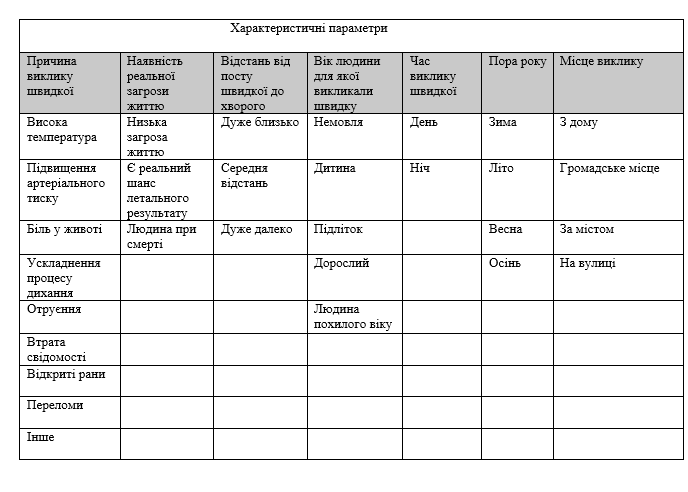

## Розподіл вірогідностей

In [ ]:
char_parameters_probability = pd.read_excel('/content/drive/MyDrive/mss_lab2/вероятности.xlsx')

In [ ]:
char_parameters_probability

,Причина виклику швидкої,Наявність реальної загрози життю,Відстань від посту швидкої до хворого,Вік людини для якої викликали швидку,Час виклику швидкої,Пора року,Місце виклику
0,0.100,0.3,0.1,0.30,0.3,0.4,0.70
1,0.150,0.6,0.8,0.10,0.7,0.2,0.15
2,0.050,0.1,0.1,0.05,NaN,0.1,0.05
3,0.010,NaN,NaN,0.05,NaN,0.3,0.10
4,0.100,NaN,NaN,0.50,NaN,NaN,NaN
5,0.200,NaN,NaN,NaN,NaN,NaN,NaN
6,0.300,NaN,NaN,NaN,NaN,NaN,NaN
7,0.005,NaN,NaN,NaN,NaN,NaN,NaN
8,0.085,NaN,NaN,NaN,NaN,NaN,NaN


введемо для більш простого запису наступні позначення:   
перший індекс  - індекс параметра  
другий індекс - індекс стану  
Таким чином, наприклад у стану "Причина виклику швидкої: Висока температура" буде індекс 00, а у "Відстань від посту швидкої до хворого : Середня відстань" буде індекс 21

In [ ]:
def get_prob(index):
  dict = ['Причина виклику швидкої',
          'Наявність реальної загрози життю',
          'Відстань від посту швидкої до хворого',
          'Вік людини для якої викликали швидку',
          'Час виклику швидкої',
          'Пора року',
          'Місце виклику']
  i = list(map(int, index))
  return char_parameters_probability[dict[i[0]]][i[1]]


def get_prob(column, row):
  dict = ['Причина виклику швидкої',
          'Наявність реальної загрози життю',
          'Відстань від посту швидкої до хворого',
          'Вік людини для якої викликали швидку',
          'Час виклику швидкої',
          'Пора року',
          'Місце виклику']
  return char_parameters_probability[dict[column]][row]

## Матриця зв'язків альтернатив параметрів

In [ ]:
matrix_of_param_alternatives = pd.read_excel('/content/drive/MyDrive/mss_lab2/зап.xlsx', index_col=0)
matrix_of_param_alternatives = matrix_of_param_alternatives.set_index(map(str, matrix_of_param_alternatives.columns))
matrix_of_param_alternatives = matrix_of_param_alternatives.set_axis(map(str, matrix_of_param_alternatives.columns), axis=1, inplace=False)

In [ ]:
matrix_of_param_alternatives

,00,01,02,03,04,05,06,07,08,10,11,12,20,21,22,30,31,32,33,34,40,41,50,51,52,53,60,61,62,63
00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.30,0.40,0.80,0.05,1.0,-0.3,0.6,0.10,0.30,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Формування мариці для розрахунків

In [ ]:
def form_column(number_of_features, remaining_configurations, prev_configurations):
  column = []
  for k in range(prev_configurations):
    for i in range(number_of_features):
      column.extend([i]*remaining_configurations)
  return column

### Формування індексів

In [ ]:
table = pd.DataFrame()
table[0] = form_column(9, 3*3*5*2*4*4, 1)
table[1] = form_column(3, 3*5*2*4*4, 9)
table[2] = form_column(3, 5*2*4*4, 9*3)
table[3] = form_column(5, 2*4*4, 9*3*3)
table[4] = form_column(2, 4*4, 9*3*3*5)
table[5] = form_column(4, 4, 9*3*3*5*2)
table[6] = form_column(4, 1, 9*3*3*5*2*4)
table

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,0,3
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
12955,8,2,2,4,1,2,3
12956,8,2,2,4,1,3,0
12957,8,2,2,4,1,3,1
12958,8,2,2,4,1,3,2


### Формування добутку незалежних ймовірностей

In [ ]:
def get_P(row):
  p = 1
  for i in range(7):
    p*= get_prob(i, row[i])
  return p

In [ ]:
table['P'] = table.apply(get_P, axis=1)
table

,0,1,2,3,4,5,6,P
0,0,0,0,0,0,0,0,0.000076
1,0,0,0,0,0,0,1,0.000016
2,0,0,0,0,0,0,2,0.000005
3,0,0,0,0,0,0,3,0.000011
4,0,0,0,0,0,1,0,0.000038
...,...,...,...,...,...,...,...,...
12955,8,2,2,4,1,2,3,0.000003
12956,8,2,2,4,1,3,0,0.000062
12957,8,2,2,4,1,3,1,0.000013
12958,8,2,2,4,1,3,2,0.000004


In [ ]:
def get_C(row):
  indices = []
  C = 1
  for i in range(7):
    string = str(i)+str(int(row[i]))
    indices.append(string.strip())
  for i in indices:
    for j in indices:
      C*= (1 + (matrix_of_param_alternatives[i][j] if not math.isnan(matrix_of_param_alternatives[i][j]) else 0))
  return C

In [ ]:
table['C'] = table.apply(get_C, axis=1)
table

,0,1,2,3,4,5,6,P,C
0,0,0,0,0,0,0,0,0.000076,2.504430
1,0,0,0,0,0,0,1,0.000016,1.419177
2,0,0,0,0,0,0,2,0.000005,0.432583
3,0,0,0,0,0,0,3,0.000011,1.268911
4,0,0,0,0,0,1,0,0.000038,3.155582
...,...,...,...,...,...,...,...,...,...
12955,8,2,2,4,1,2,3,0.000003,7.945510
12956,8,2,2,4,1,3,0,0.000062,10.779507
12957,8,2,2,4,1,3,1,0.000013,4.238609
12958,8,2,2,4,1,3,2,0.000004,45.429189


In [ ]:
table['P*C'] = table.apply(lambda row: row['P'] * row['C'], axis=1)
table['P*C/sum'] = table['P*C']/sum(table['P*C'])

## Розрахунки

In [ ]:
table

,0,1,2,3,4,5,6,P,C,P*C,P*C/sum
0,0,0,0,0,0,0,0,0.000076,2.504430,0.000189,1.041969e-05
1,0,0,0,0,0,0,1,0.000016,1.419177,0.000023,1.265248e-06
2,0,0,0,0,0,0,2,0.000005,0.432583,0.000002,1.285546e-07
3,0,0,0,0,0,0,3,0.000011,1.268911,0.000014,7.541868e-07
4,0,0,0,0,0,1,0,0.000038,3.155582,0.000119,6.564402e-06
...,...,...,...,...,...,...,...,...,...,...,...
12955,8,2,2,4,1,2,3,0.000003,7.945510,0.000024,1.300866e-06
12956,8,2,2,4,1,3,0,0.000062,10.779507,0.000673,3.706202e-05
12957,8,2,2,4,1,3,1,0.000013,4.238609,0.000057,3.122818e-06
12958,8,2,2,4,1,3,2,0.000004,45.429189,0.000203,1.115674e-05


In [ ]:
sum(table['P*C/sum'])

0.9999999999999909

In [ ]:
def get_p_of_alternative(number_of_column, number_of_row):
  return table[table[number_of_column] == number_of_row]['P*C/sum'].sum()
def get_columns_of_prob(quantities_of_features, P):
  for i in range(7):
    quantity_of_features = quantities_of_features[i]
    for j in range(quantity_of_features):
      P[i][j] = get_p_of_alternative(i,j)


In [ ]:
pij = pd.DataFrame(columns = range(0, 7), index = range(9))

In [ ]:
get_columns_of_prob([9, 3, 3, 5, 2, 4, 4], pij)

In [ ]:
pij

,0,1,2,3,4,5,6
0,0.080969,0.0576815,0.0619254,0.447345,0.256342,0.333646,0.685929
1,0.125598,0.859171,0.895958,0.0949787,0.743658,0.279162,0.0942642
2,0.0552388,0.0831479,0.0421165,0.025777,NaN,0.103089,0.0792709
3,0.0197946,NaN,NaN,0.022767,NaN,0.284104,0.140535
4,0.125554,NaN,NaN,0.409132,NaN,NaN,NaN
5,0.281503,NaN,NaN,NaN,NaN,NaN,NaN
6,0.239596,NaN,NaN,NaN,NaN,NaN,NaN
7,0.00292278,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0688237,NaN,NaN,NaN,NaN,NaN,NaN


# Другий етап морфологічного аналізу

З результатів першої лабораторної роботи було обрано наступні альтернативи:  
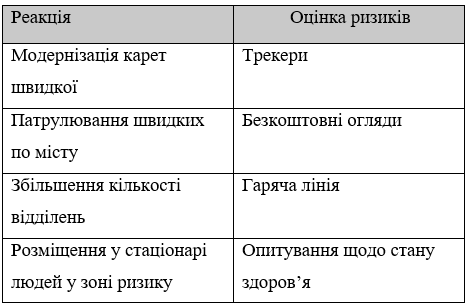  
Співставимо для зручності кожній алтернативі свій двузначний індекс аналогічно тому, як це було зроблено вище. Наприклад, альтернатива "Патрулювання швидких по місту" буде мати індекс **01** . 


## Матриця зв'язків альтернатив

In [ ]:
alternative_relation_matrix = pd.read_excel('/content/drive/MyDrive/mss_lab2/зап2етап.xlsx', index_col=0)
alternative_relation_matrix = alternative_relation_matrix.set_index(map(str, matrix_of_param_alternatives.columns))
alternative_relation_matrix = alternative_relation_matrix.set_axis(map(str, alternative_relation_matrix.columns), axis=1, inplace=False)
alternative_relation_matrix

,00,01,02,03,10,11,12,13
00,0.20,0.20,-0.2,0.1,-0.1,0.5,0.3,1.0
01,0.50,0.10,0.1,0.3,1.0,0.7,0.6,1.0
02,0.10,0.50,-0.3,0.7,-0.5,1.0,0.8,-0.4
03,1.00,1.00,-0.2,0.8,0.8,1.0,-0.3,-0.7
04,-0.10,0.20,0.5,-0.2,-0.6,0.7,0.7,0.3
05,0.30,0.90,-0.1,0.4,1.0,0.8,-0.9,-0.9
06,0.40,0.60,0.3,0.6,-0.6,0.6,0.6,0.1
07,0.50,0.10,0.8,0.6,-0.4,0.5,0.5,-0.5
08,0.10,0.10,0.1,0.5,0.3,0.2,0.2,0.1
10,-0.50,-0.70,-0.3,-1.0,0.3,-0.1,1.0,1.0


In [ ]:
def get_C(row, alt_index):
  indices = []
  for i in range(7):
    string = str(i)+str(int(row[i]))
    indices.append(string.strip())
  C = 1
  for j in indices:
    C*=(1 + alternative_relation_matrix[alt_index][j])
  return C
def norm(row, alt_index):
  return row[alt_index] / (row['alt00']+ row['alt01'] + row['alt02'] + row['alt03'] + row['alt10'] + row['alt11'] + row['alt12'] + row['alt13'])

In [ ]:
table['alt00'] = table.apply(lambda row: get_C(row, '00'), axis = 1)
table['alt01'] = table.apply(lambda row: get_C(row, '01'), axis = 1)
table['alt02'] = table.apply(lambda row: get_C(row, '02'), axis = 1)
table['alt03'] = table.apply(lambda row: get_C(row, '03'), axis = 1)
table['alt10'] = table.apply(lambda row: get_C(row, '10'), axis = 1)
table['alt11'] = table.apply(lambda row: get_C(row, '11'), axis = 1)
table['alt12'] = table.apply(lambda row: get_C(row, '12'), axis = 1)
table['alt13'] = table.apply(lambda row: get_C(row, '13'), axis = 1)

In [ ]:
table['alt00'] = table.apply(lambda row: norm(row, 'alt00'), axis = 1)
table['alt01'] = table.apply(lambda row: norm(row, 'alt01'), axis = 1)
table['alt02'] = table.apply(lambda row: norm(row, 'alt02'), axis = 1)
table['alt03'] = table.apply(lambda row: norm(row, 'alt03'), axis = 1)
table['alt10'] = table.apply(lambda row: norm(row, 'alt10'), axis = 1)
table['alt11'] = table.apply(lambda row: norm(row, 'alt11'), axis = 1)
table['alt12'] = table.apply(lambda row: norm(row, 'alt12'), axis = 1)
table['alt13'] = table.apply(lambda row: norm(row, 'alt13'), axis = 1)

In [ ]:
table['alt00_w'] = table.apply(lambda row: row['alt00'] * row['P*C/sum'], axis = 1)
table['alt01_w'] = table.apply(lambda row: row['alt01'] * row['P*C/sum'], axis = 1)
table['alt02_w'] = table.apply(lambda row: row['alt02'] * row['P*C/sum'], axis = 1)
table['alt03_w'] = table.apply(lambda row: row['alt03'] * row['P*C/sum'], axis = 1)
table['alt10_w'] = table.apply(lambda row: row['alt10'] * row['P*C/sum'], axis = 1)
table['alt11_w'] = table.apply(lambda row: row['alt11'] * row['P*C/sum'], axis = 1)
table['alt12_w'] = table.apply(lambda row: row['alt12'] * row['P*C/sum'], axis = 1)
table['alt13_w'] = table.apply(lambda row: row['alt13'] * row['P*C/sum'], axis = 1)

Тут alt[номер альтернативи]_w - це $ alt[номер] * \frac{P * C}{\sum}$, де alt[номер альтернативи] - вже нормована вырогідність 

## Розрахунки 

In [ ]:
table

,0,1,2,3,4,5,6,P,C,P*C,P*C/sum,alt00,alt01,alt02,alt03,alt10,alt11,alt12,alt13,alt00_w,alt01_w,alt02_w,alt03_w,alt10_w,alt11_w,alt12_w,alt13_w
0,0,0,0,0,0,0,0,0.000076,2.504430,0.000189,1.041969e-05,0.022867,0.007370,0.044093,0.000000,0.070019,0.232482,0.633004,0.917293,2.382625e-07,7.679635e-08,4.594365e-07,0.000000e+00,7.295710e-07,2.422390e-06,6.595701e-06,9.557908e-06
1,0,0,0,0,0,0,1,0.000016,1.419177,0.000023,1.265248e-06,0.045090,0.018704,0.085554,0.000000,0.151078,0.441221,0.692801,0.661243,5.704978e-08,2.366460e-08,1.082468e-07,0.000000e+00,1.911508e-07,5.582537e-07,8.765652e-07,8.366365e-07
2,0,0,0,0,0,0,2,0.000005,0.432583,0.000002,1.285546e-07,0.051536,0.012530,0.046956,0.000000,0.149428,0.326725,0.432283,0.877166,6.625166e-09,1.610757e-09,6.036387e-09,0.000000e+00,1.920962e-08,4.200204e-08,5.557201e-08,1.127637e-07
3,0,0,0,0,0,0,3,0.000011,1.268911,0.000014,7.541868e-07,0.044325,0.030775,0.161356,0.000000,0.167358,0.720337,0.727105,0.000000,3.342940e-08,2.321031e-08,1.216925e-07,0.000000e+00,1.262190e-07,5.432689e-07,5.483728e-07,0.000000e+00
4,0,0,0,0,0,1,0,0.000038,3.155582,0.000119,6.564402e-06,0.015141,0.005029,0.031795,0.000000,0.081594,0.174775,0.688895,0.912503,9.938842e-08,3.301152e-08,2.087144e-07,0.000000e+00,5.356162e-07,1.147293e-06,4.522184e-06,5.990033e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,8,2,2,4,1,2,3,0.000003,7.945510,0.000024,1.300866e-06,0.203359,0.161716,0.269210,0.620275,0.295932,0.851131,0.000000,0.000000,2.645426e-07,2.103715e-07,3.502064e-07,8.068947e-07,3.849681e-07,1.107207e-06,0.000000e+00,0.000000e+00
12956,8,2,2,4,1,3,0,0.000062,10.779507,0.000673,3.706202e-05,0.239100,0.121453,0.206463,0.651569,0.261689,0.858258,0.000000,0.000000,8.861547e-06,4.501296e-06,7.651939e-06,2.414845e-05,9.698731e-06,3.180876e-05,0.000000e+00,0.000000e+00
12957,8,2,2,4,1,3,1,0.000013,4.238609,0.000057,3.122818e-06,0.261318,0.172108,0.234509,0.619732,0.301364,0.838885,0.000000,0.000000,8.160496e-07,5.374628e-07,7.323302e-07,1.935312e-06,9.411064e-07,2.619684e-06,0.000000e+00,0.000000e+00
12958,8,2,2,4,1,3,2,0.000004,45.429189,0.000203,1.115674e-05,0.335615,0.142667,0.154710,0.641962,0.355410,0.791929,0.000000,0.000000,3.744370e-06,1.591697e-06,1.726057e-06,7.162201e-06,3.965218e-06,8.835342e-06,0.000000e+00,0.000000e+00


## Розрахунок загальної результативності альтернатив

Тепер просумуємо:

In [ ]:
alt_sum = pd.DataFrame(data = {'alt00': [table['alt00_w'].sum()], 'alt01': [table['alt01_w'].sum()], 'alt02': [table['alt02_w'].sum()], 'alt03': [table['alt03_w'].sum()], 'alt10': [table['alt10_w'].sum()], 'alt11': [table['alt11_w'].sum()], 'alt12': [table['alt12_w'].sum()], 'alt13': [table['alt13_w'].sum()]},index=['sum'])
alt_sum

,alt00,alt01,alt02,alt03,alt10,alt11,alt12,alt13
sum,0.176805,0.104479,0.169128,0.361212,0.332295,0.812925,0.119108,0.081919


Бачимо, що найбільш оптимальною альтернативою є альтернатива **"Безкоштовні огляди"**

# Висновки

Як бачимо, альтернатива **"Безкоштовні огляди"** дуже суттєво виділяється с поміж інших. Це пояснюється тим, що у неї дуже хороша матриця зв'язків альтернатив. Очевидно, що це був очікуваний результат.  
Другим та третім за значимістю йде варіант **збільшення кількості відділень** та **трекери**. Вони отримали меньшу значимість, оскільки наприклад трекери розраховані на невелику кількість людей і можеть бути застосовані лише до людей у зоні ризику, в той час як безкоштовні огляди націлені на всі типи населення, у всіх зонах ризику. Крім того, на відміну від трекерів вони зменшують потенційну відстань до людини, що викликає швидку.   
Трохи неочікуваним є те, що альтернативи  **"Безкоштовні огляди"** та **збільшення кількості відділень** суттєво відрізняються за значимістю. Це можна пояснити тим, що матриці зв'язків альтернатив було заповнено покладаючись на "експертну оцінку" некомпетентного спеціаліста в області медицини(тобто мене).  
Можна дати такі рекомендації:  
1) уточнити вхідні дані матриць зв'язків та розподіли вірогідностей у більш компетентних експертів в медицині  
2) враховувати цінові рамки (хоч трекери і менш результативні, вони коштують меньше) 